### Data Visualization

In [1]:
import numpy as np
import pandas as pd
import warnings
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from IPython.display import display, HTML

import nltk

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [2]:
# Load the preprocessed dataset
df = pd.read_csv('../data/processed_essays.csv')

In [3]:
tokens = df['lemmatized_text'].apply(lambda x: x.split())
target_columns = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']

<b>As a first thing, let's see which words are prominent in the essays and try to understand the importance of words using wordcloud and plotting the top-30 words on the basis of their respective frequency.</b>

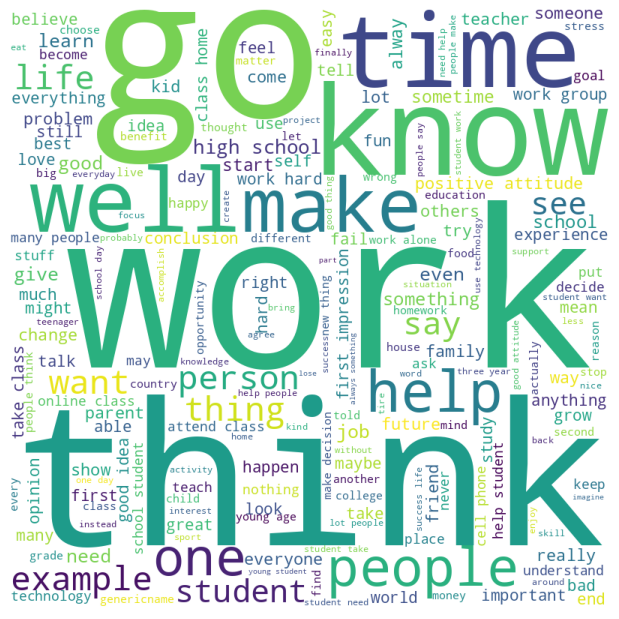

In [4]:
# Get all possible words as a string
words = ' '.join(df.lemmatized_text.tolist())

# Create a wordcloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(words)

# Plot the wordcloud
plt.figure(figsize=(6, 6), facecolor=None)

plt.imshow(wordcloud)

plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

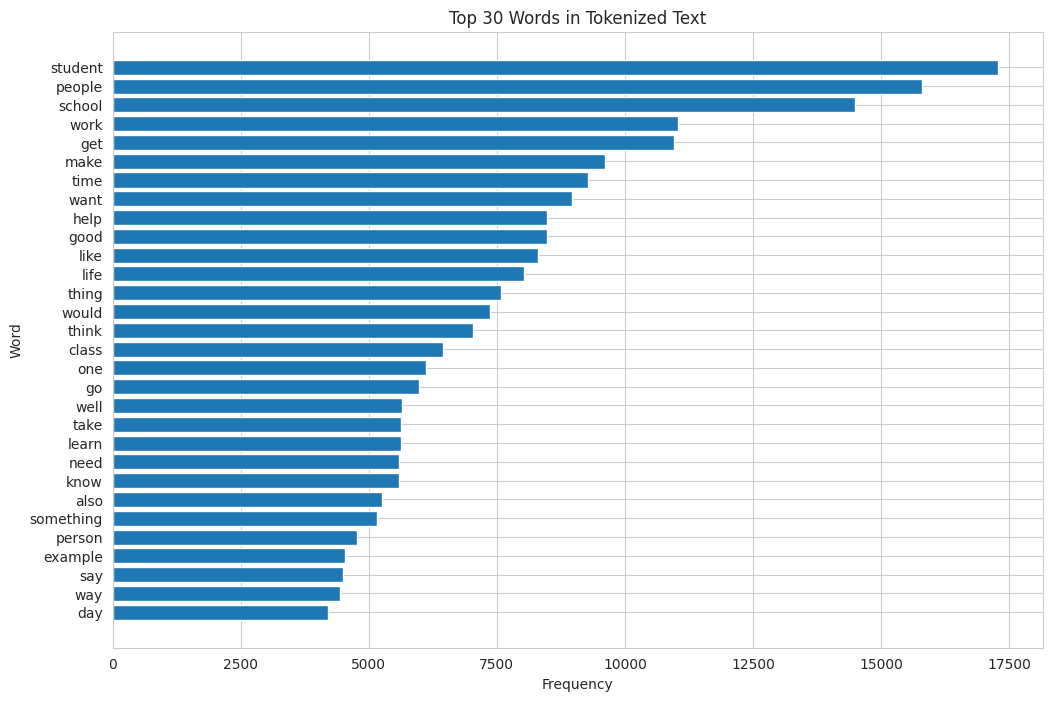

In [5]:
# Flatten the list of tokenized words
words = [word for sentence in tokens for word in sentence]

# Count the frequency of each word
word_freq = Counter(words)

# Print the 30 most common words and their frequencies
word_list = word_freq.most_common(30)

# Sort the word list in descending order of frequency
word_list = sorted(word_list, key=lambda x: x[1], reverse=False)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar chart of the word frequencies
plt.barh([word[0] for word in word_list], [word[1] for word in word_list])

# Set the chart title and axis labels
plt.title('Top 30 Words in Tokenized Text')
plt.xlabel('Frequency')
plt.ylabel('Word')

# Show the chart
plt.show()

<b>We see from above visualizations that student, people, and school are the three top most used words in the essay. This further gives some insight that essays could be more likely to be related to education, learning, or group of individuals in education.</b>

<b>Let's try to understand more in terms of how long the essays are written by students,  number of sentences used by students in essays, what is the lenght of those sentences or how many words does these essay contain.</b>

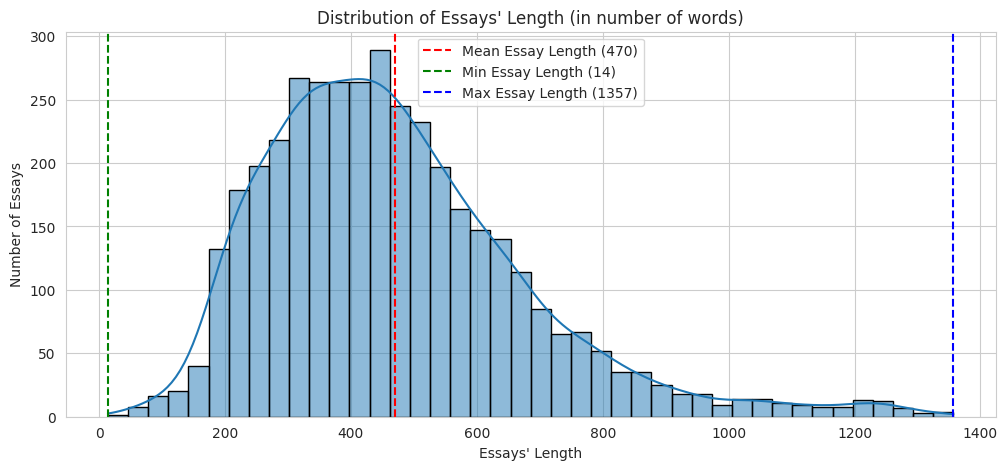

In [6]:
# Compute the length of each essay
essay_lengths = df['full_text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Compute the statistics
mean_length = round(essay_lengths.mean())
min_length = round(essay_lengths.min())
max_length = round(essay_lengths.max())

# Set the figure size and style
plt.figure(figsize=(12, 5))

# Plot the distribution of essay lengths
sns.histplot(data=essay_lengths, kde=True, edgecolor='k')

# Add a vertical line for the mean essay length
plt.axvline(x=mean_length, color='red', linestyle='--', label=f'Mean Essay Length ({mean_length})')

# Add a vertical line for the minimum essay length
plt.axvline(x=min_length, color='green', linestyle='--', label=f'Min Essay Length ({min_length})')

# Add a vertical line for the minimum essay length
plt.axvline(x=max_length, color='blue', linestyle='--', label=f'Max Essay Length ({max_length})')

# Set the title and labels
plt.title("Distribution of Essays' Length (in number of words)")
plt.xlabel("Essays' Length")
plt.ylabel("Number of Essays")

# Add a legend
plt.legend()

# Show the plot
plt.show()

<b>It can be seen from the above that some students have written very lengthy essays which skews the overall distribution towards right.</b>

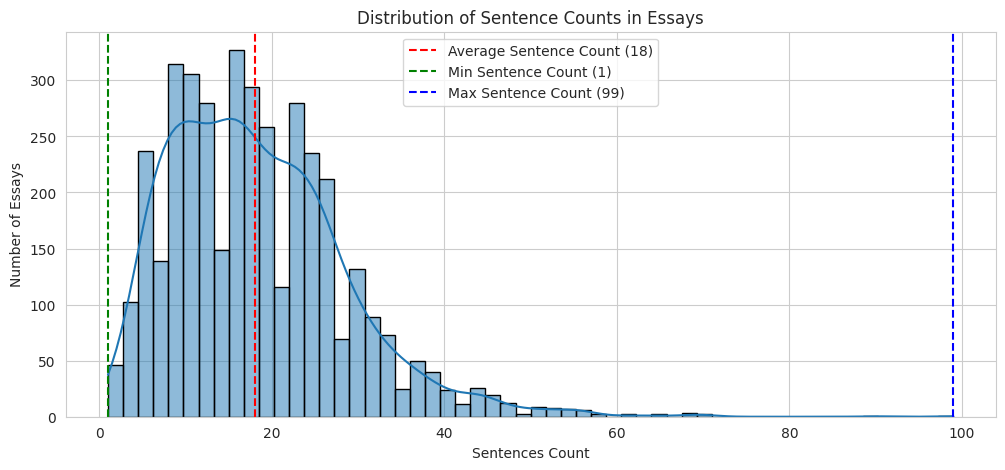

In [7]:
avg_sent = round(df['sent_count'].mean())
min_sent = round(df['sent_count'].min())
max_sent = round(df['sent_count'].max())

# Set the figure size and style
plt.figure(figsize=(12, 5))

# Plot the distribution of sentence counts
title = 'Distribution of Sentence Counts in Essays'
sns.histplot(df['sent_count'], kde=True, edgecolor='k')

plt.axvline(x=avg_sent, color='red', linestyle='--', label=f'Average Sentence Count ({avg_sent})')
plt.axvline(x=min_sent, color='green', linestyle='--', label=f'Min Sentence Count ({min_sent})')
plt.axvline(x=max_sent, color='blue', linestyle='--', label=f'Max Sentence Count ({max_sent})')

plt.legend()
plt.title(title)
plt.xlabel('Sentences Count')
plt.ylabel('Number of Essays')

# Show the plot
plt.show()

<b>Above makes sense as students are expected to write distinct number of sentences in essay. The number of sentences might also impacted with the topic of essays assigned to students.</b>

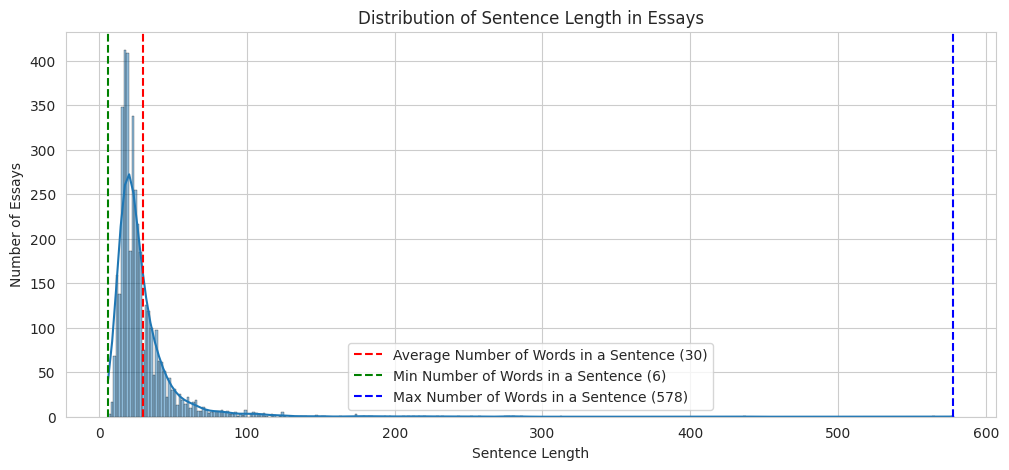

In [8]:
avg_sent_len = round(np.mean(df['sent_len']))
min_sent_len = round(np.min(df['sent_len']))
max_sent_len = round(np.max(df['sent_len']))

# Set the figure size and style
plt.figure(figsize=(12, 5))

# Plot the distribution of sentence length
title = 'Distribution of Sentence Length in Essays'
sns.histplot(df['sent_len'], kde=True, edgecolor='k')

plt.axvline(x=avg_sent_len, color='r', linestyle='--', label=f'Average Number of Words in a Sentence ({avg_sent_len})')
plt.axvline(x=min_sent_len, color='g', linestyle='--', label=f'Min Number of Words in a Sentence ({min_sent_len})')
plt.axvline(x=max_sent_len, color='b', linestyle='--', label=f'Max Number of Words in a Sentence ({max_sent_len})')

plt.legend()
plt.title(title)
plt.xlabel('Sentence Length')
plt.ylabel('Number of Essays')

# Show the plot
plt.show()

<b>Distribution of sentences count is highly rightly skewed in nature, which signifies that how some students wrote exceptionally long sentences.</b>

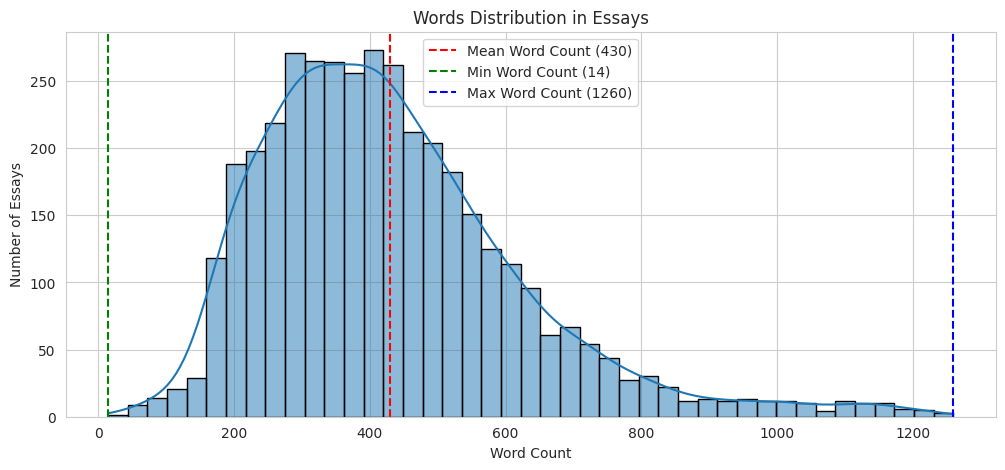

In [9]:
# Set the figure size and style
fig = plt.figure(figsize=(12, 5))

# Plot the distribution of word count
sns.histplot(data=df, x="word_count", kde=True, edgecolor='k')

# Plot the mean of word count
mean_word_count = round(df['word_count'].mean())
min_word_count = df['word_count'].min()
max_word_count = df['word_count'].max()

plt.axvline(x=mean_word_count, color='red', linestyle='--', label=f'Mean Word Count ({mean_word_count})')
plt.axvline(x=min_word_count, color='g', linestyle='--', label=f'Min Word Count ({min_word_count})')
plt.axvline(x=max_word_count, color='b', linestyle='--', label=f'Max Word Count ({max_word_count})')

plt.legend()

# Set the title and labels
plt.title("Words Distribution in Essays")
plt.xlabel("Word Count")
plt.ylabel("Number of Essays")

# Show the plot
plt.show()


<b>This visualization is in alignment with the essay length signifying how some students used more words to write essays and made the normal distribution rightly skewed.</b>

### Data mining for target scores

<b>Let's try to understand how the score of essays are assigned.</b>

In [10]:
low_df = df[df['score_category'] == 'low'].reset_index()
med_df = df[df['score_category'] == 'medium'].reset_index()
high_df = df[df['score_category'] == 'high'].reset_index()

print('Total Low Scoring Essays   :', low_df.shape[0])
print('Total Medium Scoring Essays:', med_df.shape[0])
print('Total High Scoring Essays  :', high_df.shape[0])

Total Low Scoring Essays   : 567
Total Medium Scoring Essays: 3094
Total High Scoring Essays  : 250


<b>Basis on the criteria, if any 5 or more of the 6 scoring measures are less than equal to 2.5, then essay is low-scoring; if any 5 or more of the 6 scoring measures are greater than equal to 4.0 then essay is high-scoring; else medium-scoring.</b>

<b>As a grader, I would think the first thing to look out is the number of spelling mistakes done by the students in essay.>/b>

<b>Let's look at the proportion of mistakes in low-scoring and high-scoring essays.</b>

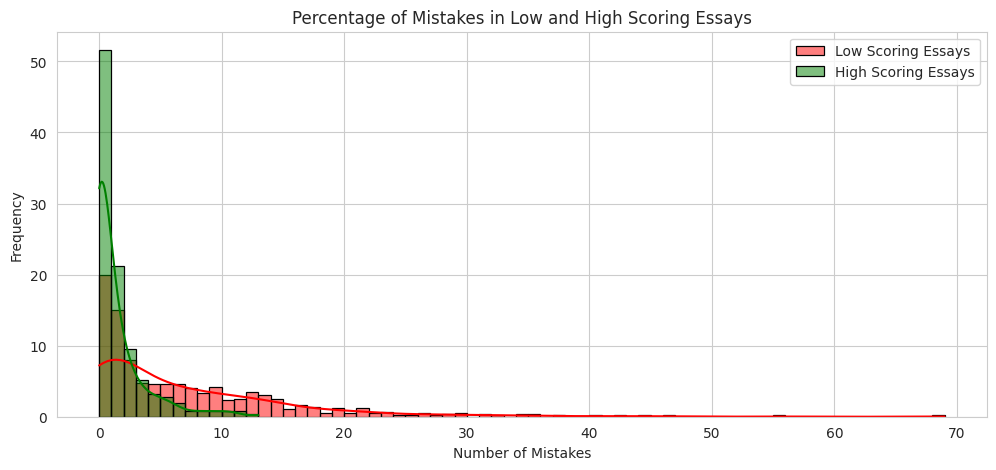

In [11]:
display(
    HTML(
        f"""<b>Minimum number of mistakes in a low-scoring essay: {low_df['num_mistakes'].min()}<br>
               Maximum number of mistakes in a high-scoring essay: {high_df['num_mistakes'].max()}
            </b>
        """
    )
)

fig, ax = plt.subplots(figsize=(12, 5))

# Plot the histograms of num_mistakes for low_df and high_df
sns.histplot(data=low_df, x='num_mistakes', color='red', stat='percent', label='Low Scoring Essays',
             kde=True, edgecolor='k', binwidth=1)
sns.histplot(data=high_df, x='num_mistakes', color='green', stat='percent', label='High Scoring Essays',
             kde=True, edgecolor='k', binwidth=1)

# Set the chart title and axis labels
plt.title('Percentage of Mistakes in Low and High Scoring Essays')
plt.xlabel('Number of Mistakes')
plt.ylabel('Frequency')

# Add a legend to the chart
plt.legend()

# Show the chart
plt.show()

<b>Above plot signifies how essays with most spelling mistakes were scored poorly, which makes sense to give more score to essays with rightly spelled words.</b>

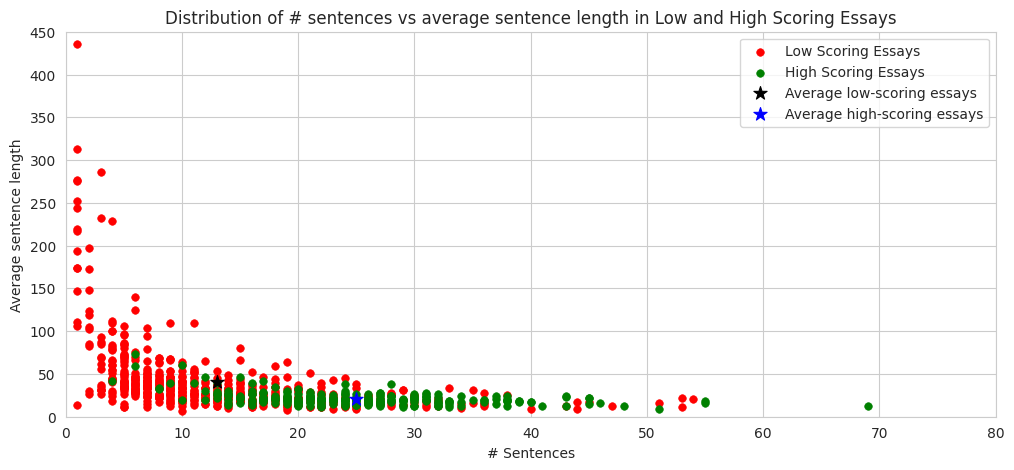

In [12]:
# Scatter plot for sent_len vs word_count by Score_Category
fig, ax = plt.subplots(figsize=(12, 5))

sns.scatterplot(x='sent_count', y='sent_len', color='red', label='Low Scoring Essays',
                data=low_df, ax=ax, edgecolor='red', s=30)

# Scatter plot for sent_len vs word_count by Score_Category for high scoring essays
sns.scatterplot(x='sent_count', y='sent_len', color='green', label='High Scoring Essays',
                data=high_df, ax=ax, edgecolor='green', s=30)

# Set x and y limits for the plot
plt.xlim(0, 80)
plt.ylim(0, 450)

# Calculate and plot the average word_count for low and high scoring essays
low_sent_count_mean = round(low_df['sent_count'].mean())
high_sent_count_mean = round(high_df['sent_count'].mean())

# Calculate and plot the average sent_len for low and high scoring essays
low_sent_len_mean = round(low_df['sent_len'].mean())
high_sent_len_mean = round(high_df['sent_len'].mean())

sns.scatterplot(x=[low_sent_count_mean], y=[low_sent_len_mean], color="black",
                s=100, edgecolor='black', marker="*", label="Average low-scoring essays")
sns.scatterplot(x=[high_sent_count_mean], y=[high_sent_len_mean], color="blue",
                s=100, edgecolor='blue', marker="*", label="Average high-scoring essays")

# Add plot titles and labels
plt.title('Distribution of # sentences vs average sentence length in Low and High Scoring Essays')
plt.xlabel('# Sentences')
plt.ylabel('Average sentence length')

# Show the plot
plt.show()

<b>This insight is interesting and signifies how students with high scoring essays used shorter sentences, whereas students who got low score wrote fewer but lengthy sentences.</b>

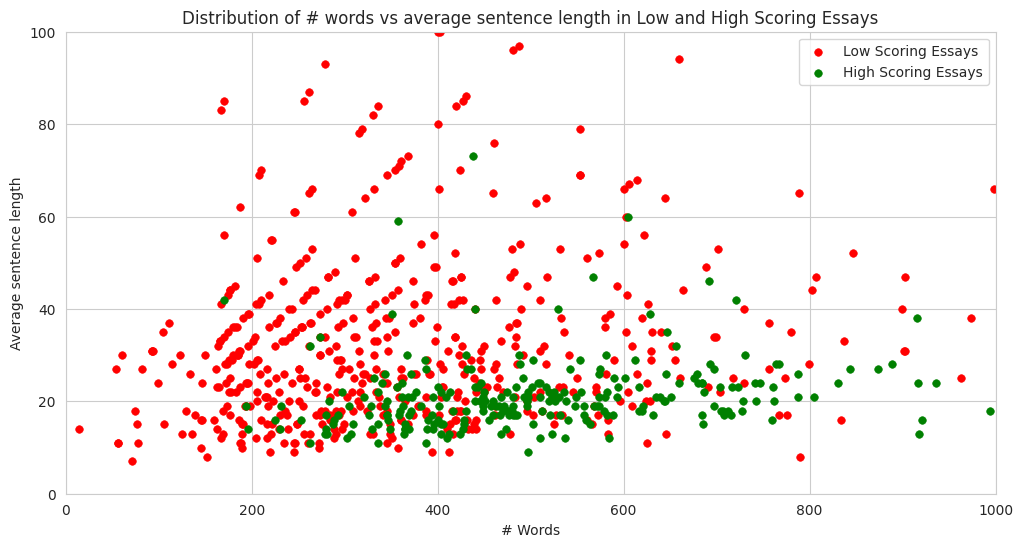

In [13]:
# Scatter plot for sent_len vs word_count by Score_Category
fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(x='word_count', y='sent_len', color='red', label='Low Scoring Essays',
                data=low_df, ax=ax, edgecolor='red', s=30)

# Scatter plot for sent_len vs word_count by Score_Category for high scoring essays
sns.scatterplot(x='word_count', y='sent_len', color='green', label='High Scoring Essays',
                data=high_df, ax=ax, edgecolor='green', s=30)

# Set x and y limits for the plot
plt.xlim(0, 1000)
plt.ylim(0, 100)

# Calculate and plot the average word_count for low and high scoring essays
low_word_count_mean = round(low_df['word_count'].mean())
high_word_count_mean = round(high_df['word_count'].mean())

# Calculate and plot the average sent_len for low and high scoring essays
low_sent_len_mean = round(low_df['sent_len'].mean())
high_sent_len_mean = round(high_df['sent_len'].mean())

# Add plot titles and labels
plt.title('Distribution of # words vs average sentence length in Low and High Scoring Essays')
plt.xlabel('# Words')
plt.ylabel('Average sentence length')

# Show the plot
plt.show()

#Try histogram

<b>This visualization makes sense as students with low scoring essays used more words to make their sentences lengthy.</b>

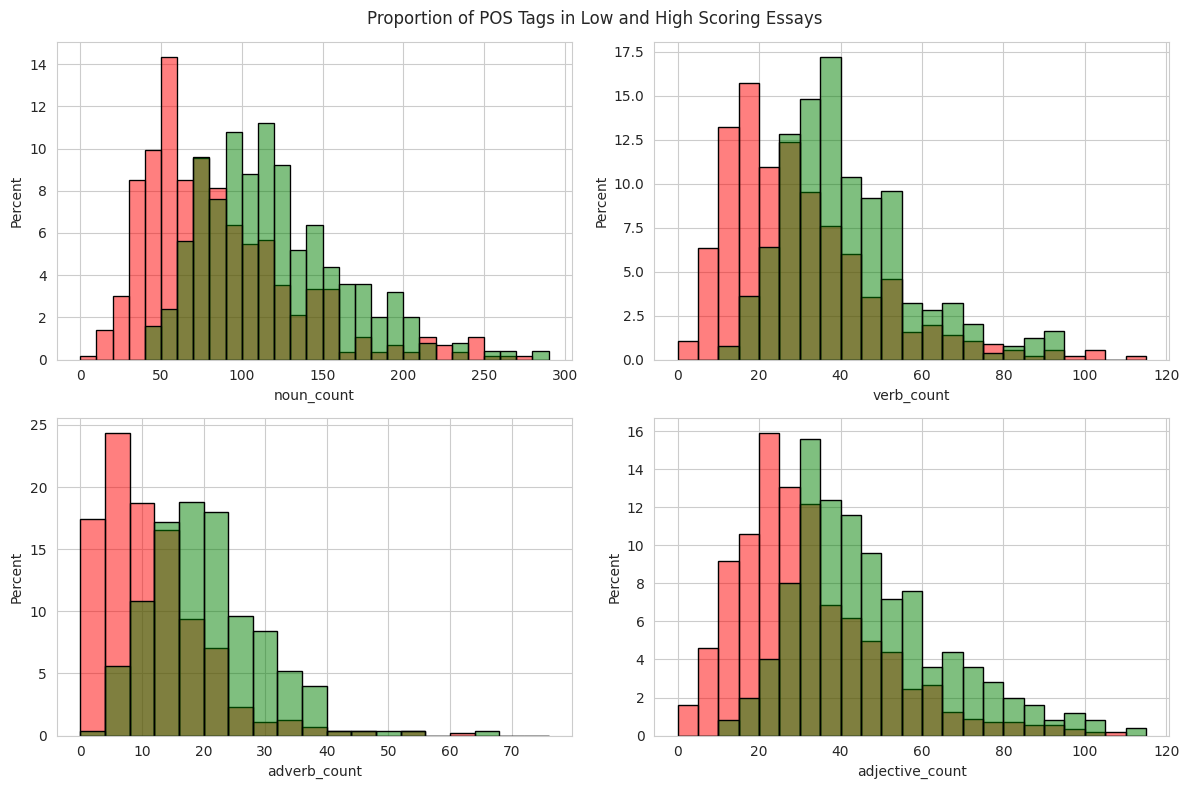

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(x='noun_count', data=low_df, stat= 'percent', color='red',
             alpha=0.5, label='Low Scoring Essays', ax=axs[0, 0], edgecolor='k', bins=np.arange(0, 300, 10))
sns.histplot(x='noun_count', data=high_df, stat= 'percent', color='green',
             alpha=0.5, label='High Scoring Essays', ax=axs[0, 0], edgecolor='k', bins=np.arange(0, 300, 10))

sns.histplot(x='verb_count', data=low_df, stat= 'percent', color='red',
             alpha=0.5, label='Low Scoring Essays', ax=axs[0, 1], edgecolor='k', bins=np.arange(0, 120, 5))
sns.histplot(x='verb_count', data=high_df, stat= 'percent', color='green',
             alpha=0.5, label='High Scoring Essays', ax=axs[0, 1], edgecolor='k', bins=np.arange(0, 120, 5))

sns.histplot(x='adverb_count', data=low_df, stat= 'percent', color='red',
             alpha=0.5, label='Low Scoring Essays', ax=axs[1, 0], edgecolor='k', bins=np.arange(0, 80, 4))
sns.histplot(x='adverb_count', data=high_df, stat= 'percent', color='green',
             alpha=0.5, label='High Scoring Essays', ax=axs[1, 0], edgecolor='k', bins=np.arange(0, 80, 4))

sns.histplot(x='adjective_count', data=low_df, stat= 'percent', color='red',
             alpha=0.5, label='Low Scoring Essays', ax=axs[1, 1], edgecolor='k', bins=np.arange(0, 120, 5))
sns.histplot(x='adjective_count', data=high_df, stat= 'percent', color='green',
             alpha=0.5, label='High Scoring Essays', ax=axs[1, 1], edgecolor='k', bins=np.arange(0, 120, 5))

plt.suptitle('Proportion of POS Tags in Low and High Scoring Essays')
plt.tight_layout()

plt.show()

<b>Another good insight is that how students used more nouns, adverbs, adjectives and verbs in their essays to get a high score.</b>

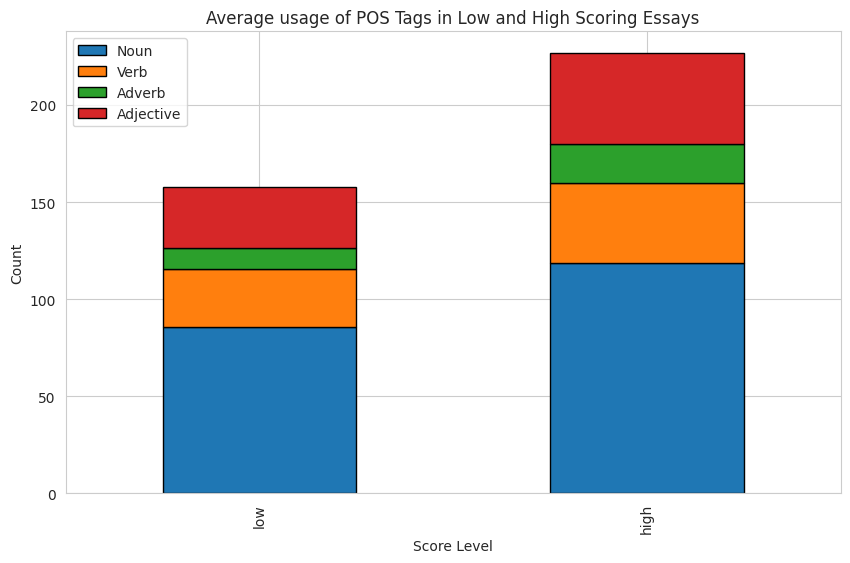

In [15]:
# create a dataframe with aggregated counts for each POS tag and score level
pos_counts = pd.concat([low_df.mean(), high_df.mean()], axis=1)
pos_counts.columns = ['low', 'high']
pos_counts = pos_counts[['low', 'high']].T[['noun_count', 'verb_count', 'adverb_count', 'adjective_count']]

# plot the stacked bar chart
pos_counts.plot(kind='bar', stacked=True, figsize=(10, 6), edgecolor='k')
plt.xlabel('Score Level')
plt.ylabel('Count')
plt.title('Average usage of POS Tags in Low and High Scoring Essays')
plt.legend(['Noun', 'Verb', 'Adverb', 'Adjective'])
plt.show()

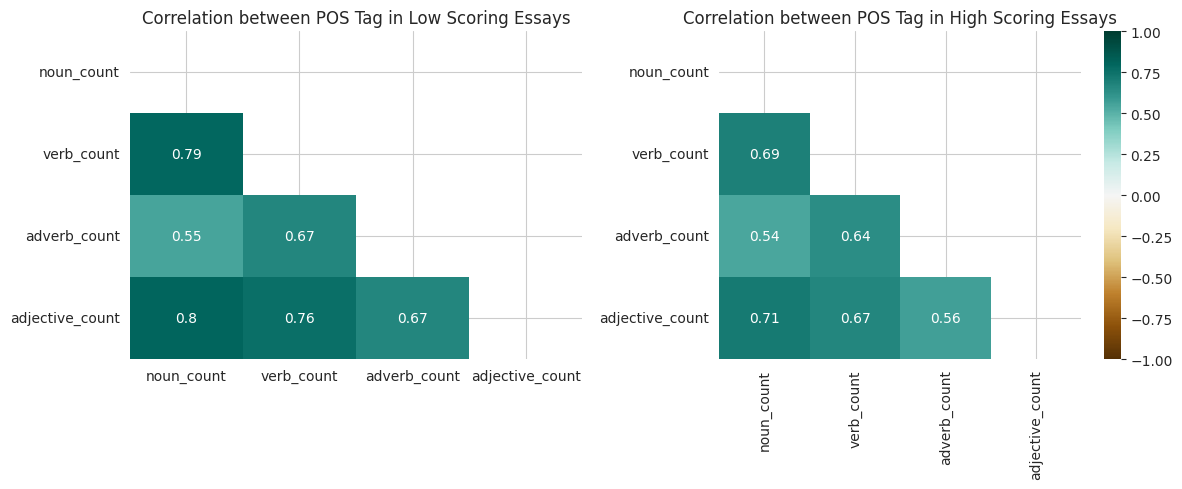

In [16]:
# Calculate the correlation matrix for the four columns in low_df
low_corr = low_df[['noun_count', 'verb_count', 'adverb_count', 'adjective_count']].corr()
mask = np.triu(np.ones_like(low_corr, dtype=np.bool_))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(low_corr, cmap='BrBG', mask=mask, annot=True, cbar=False,
            annot_kws={"fontsize": 10}, vmin=-1, vmax=1, ax=axes[0])

# Set the chart title
axes[0].set_title('Correlation between POS Tag in Low Scoring Essays')

# Calculate the correlation matrix for the four columns in high_df
high_corr = high_df[['noun_count', 'verb_count', 'adverb_count', 'adjective_count']].corr()
mask = np.triu(np.ones_like(high_corr, dtype=np.bool_))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(high_corr, cmap='BrBG', mask=mask, annot=True,
            annot_kws={"fontsize": 10}, vmin=-1, vmax=1, ax=axes[1])

# Set the chart title
axes[1].set_title('Correlation between POS Tag in High Scoring Essays')

# Display the chart
plt.tight_layout()
plt.show()

<b>Above correlation is an attempt to understand if there are some hidden inter-relationships in the usage of POS tags in essays.</b>

<b>For example, in the low-scoring essays correlation heat-map, we can see how students have mostly used nouns with verbs and adjectives with a high correlation, here we can give personalized recommendations to the students to use more adverbs with nouns to increase the score of essay.</b>

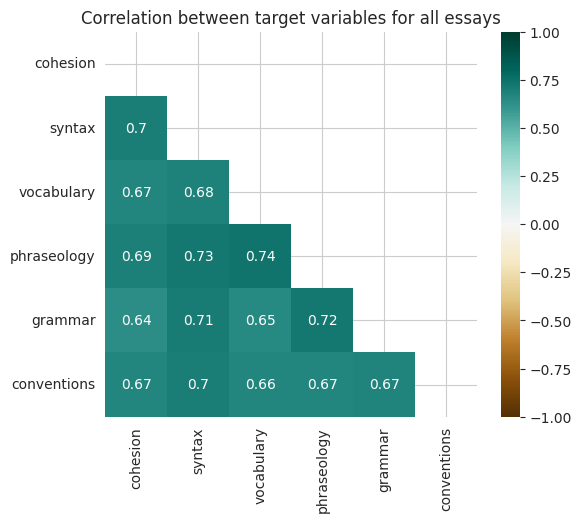

In [17]:
# Calculate the correlation matrix for the four columns in df
corr = df[target_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))

fig, axes = plt.subplots(figsize=(6, 5))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr, cmap='BrBG', mask=mask, annot=True,
            annot_kws={"fontsize": 10}, vmin=-1, vmax=1)

# Set the chart title
plt.title('Correlation between target variables for all essays')

plt.show()